# Three optimization problems with four optimization algorithms

In [1]:
import mlrose_hiive as mh

import matplotlib.pyplot as plt
import seaborn

import pandas as pd
import numpy as np
from statistics import mean
from time import process_time
import itertools 

In [21]:
%run ./ML_assignment2_OptimizationFunctions.ipynb

In [3]:
# def rhc(prob, max_attempts, max_iters):
#     algo = 'rhc'
#     stime = process_time()
#     best_state_rhc, best_fitness_rhc, fitness_curve_rhc = mh.random_hill_climb(prob, 
#                            max_attempts=max_attempts, 
#                            max_iters=max_iters, 
#                            curve=True,
#                            restarts = 100,
#                            random_state=0)
#     etime = process_time()
#     t = etime - stime
#     result = pd.DataFrame({
#         'algo':[algo],
#         'best fitness':[best_fitness_rhc],
#         'iterations':[len(fitness_curve_rhc)],
#         'time':[t]
#     })
#     return result, fitness_curve_rhc

In [4]:
# def sa(prob, max_attempts, max_iters, schedule):
#     algo = 'sa'
#     stime = process_time()
#     best_state_sa, best_fitness_sa, fitness_curve_sa = mh.simulated_annealing(prob, 
#                            max_attempts=max_attempts, 
#                            max_iters=max_iters, 
#                            curve=True,
#                            schedule = schedule,
#                            random_state=0)
#     etime = process_time()
#     t = etime - stime
#     result = pd.DataFrame({
#         'algo':[algo],
#         'best fitness':[best_fitness_sa],
#         'iterations':[len(fitness_curve_sa)],
#         'time':[t]
#     })
#     return result, fitness_curve_sa

In [5]:
# def ga(prob, max_attempts, max_iters, mutation_prob):
#     algo = 'ga'
#     stime = process_time()
#     best_state_ga, best_fitness_ga, fitness_curve_ga = mh.genetic_alg(prob, 
#                            max_attempts=max_attempts, 
#                            max_iters=max_iters, 
#                            curve=True,                                                  
#                            mutation_prob=mutation_prob,
#                            random_state=0)
#     etime = process_time()
#     t = etime - stime
#     result = pd.DataFrame({
#         'algo':[algo],
#         'best fitness':[best_fitness_ga],
#         'iterations':[len(fitness_curve_ga)],
#         'time':[t]
#     })
#     return result, fitness_curve_ga

In [6]:
# def mimic(prob, max_attempts, max_iters, keep_pct):
#     algo = 'mimc'
#     stime = process_time()
#     best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mh.mimic(prob, 
#                            max_attempts=max_attempts, 
#                            max_iters=max_iters, 
#                            curve=True,                                                  
#                            keep_pct = keep_pct,
#                            random_state=0)
#     etime = process_time()
#     t = etime - stime
#     result = pd.DataFrame({
#         'algo':[algo],
#         'best fitness':[best_fitness_mimic],
#         'iterations':[len(fitness_curve_mimic)],
#         'time':[t]
#     })
#     return result, fitness_curve_mimic

# Four peaks problem

In [23]:
# four peaks problem
fitness_fn = mh.FourPeaks()
prob = mh.DiscreteOpt(length = 100, fitness_fn=fitness_fn, maximize=True)
prob2 = mh.DiscreteOpt(length = 300, fitness_fn=fitness_fn, maximize=True)

  algo  best fitness  iterations  time
0  rhc          12.0          10   0.0
  algo  best fitness  iterations  time
0  rhc           7.0          10   0.0


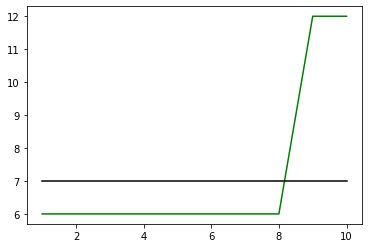

In [24]:
# four peaks rhc
max_attempts = 10
max_iters = 10
result_rhc, curve_rhc = rhc(prob, max_attempts, max_iters)
print(result_rhc)
plt.plot(range(1, len(curve_rhc[:,0])+1), curve_rhc[:,0], label='rhc', color='green')

# increase samples
max_attempts = 10
max_iters = 100
result_rhc2, curve_rhc2 = rhc(prob2, max_attempts, max_iters)
print(result_rhc2)
plt.plot(range(1, len(curve_rhc2[:,0])+1), curve_rhc2[:,0], label='rhc', color='black')

In [25]:
# four peaks sa
max_attempts = 10
max_iters = 10
schedule = mh.ExpDecay()
result_sa, curve_sa = sa(prob, max_attempts, max_iters, schedule)
# print(result_sa)
# plt.plot(curve_sa[:,0], curve_sa[:,1], label='sa', color='red')

max_attempts = 10
max_iters = 100
schedule = mh.ExpDecay()
result_sa2, curve_sa2 = sa(prob2, max_attempts, max_iters, schedule)

In [26]:
# four peaks ga
max_attempts = 10
max_iters = 10
mutation_prob = 0.2
schedule = mh.ExpDecay()
result_ga, curve_ga = ga(prob, max_attempts, max_iters, mutation_prob)
print(result_ga)
# plt.plot(curve_ga[:,0], curve_ga[:,1], label='ga', color='orange')

max_attempts = 10
max_iters = 100
mutation_prob = 0.2
schedule = mh.ExpDecay()
result_ga2, curve_ga2 = ga(prob2, max_attempts, max_iters, mutation_prob)

  algo  best fitness  iterations   time
0   ga          16.0          10  0.016


   algo  best fitness  iterations     time
0  mimc          25.0          10  20.8125


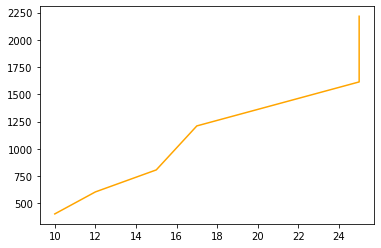

In [11]:
# four peaks mimc
max_attempts = 10
max_iters = 10
keep_pct = 0.2
schedule = mh.ExpDecay()
result_mimic, curve_mimic = mimic(prob, max_attempts, max_iters, keep_pct)
print(result_mimic)
plt.plot(curve_mimic[:,0], curve_mimic[:,1], label='mimic', color='orange')

In [12]:
max_attempts = 10
max_iters = 100
keep_pct = 0.2
schedule = mh.ExpDecay()
result_mimic2, curve_mimic2 = mimic(prob2, max_attempts, max_iters, keep_pct)

In [27]:
fps = pd.DataFrame()
fps=fps.append([result_rhc, result_sa, result_ga, result_mimic]).reset_index()
fps2 = pd.DataFrame()
fps2=fps2.append([result_rhc2, result_sa2, result_ga2, result_mimic2]).reset_index()
print(fps)
print(fps2)

   index  algo  best fitness  iterations     time
0      0   rhc          12.0          10   0.0000
1      0    sa           2.0          10   0.0000
2      0    ga          16.0          10   0.0160
3      0  mimc          25.0          10  20.8125
   index  algo  best fitness  iterations        time
0      0   rhc           7.0          10    0.000000
1      0    sa           1.0         100    0.000000
2      0    ga          35.0          60    0.328000
3      0  mimc          33.0          39  686.484375


In [14]:
# iterations = range(1, 101)
# plt.plot(iterations, curve_rhc[:,0],  label='rhc', color='green')
# plt.plot(iterations, curve_sa[:,0],  label='sa', color='red')
# plt.plot(iterations, curve_ga[:,0], label='ga', color='orange')
# plt.plot(iterations, curve_mimic[:,0], label='mimic', color='blue')
# plt.xlabel("Iterations")
# plt.ylabel("Fitness")
# plt.title('problem 1 set 1')

In [15]:
# iterations = range(1, 1001)
# plt.plot(iterations, curve_rhc2[:,0],  label='rhc', color='green')
# plt.plot(iterations, curve_sa2[:,0],  label='sa', color='red')
# plt.plot(iterations, curve_ga2[:,0], label='ga', color='orange')
# plt.plot(iterations, curve_mimic2[:,0], label='mimic', color='blue')
# plt.xlabel("Iterations")
# plt.ylabel("Fitness")
# plt.title('problem 1 set 2')

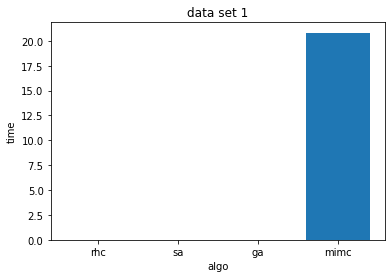

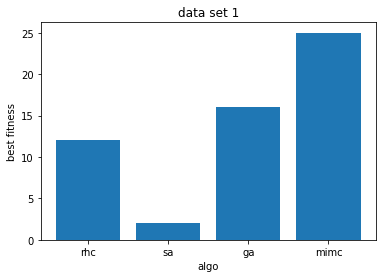

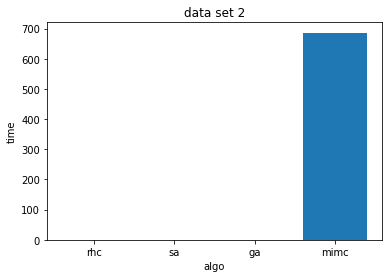

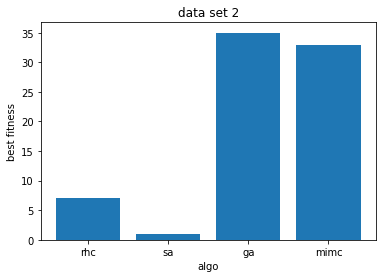

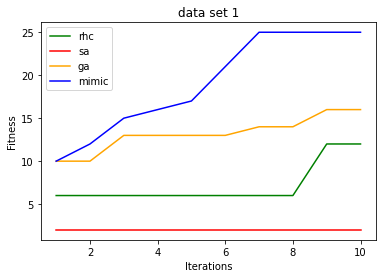

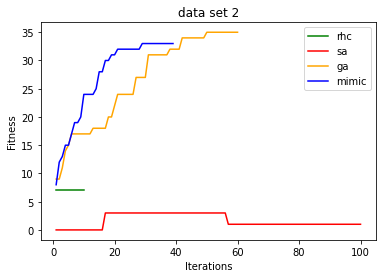

In [28]:
curves = [curve_rhc, curve_sa, curve_ga, curve_mimic,
          curve_rhc2, curve_sa2, curve_ga2, curve_mimic2]
graph(fps, fps2, curves)